In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50
from matplotlib import pyplot as plt


In [2]:
(training_images, training_labels), (validation_images, validation_labels) = tf.keras.datasets.cifar10.load_data()



170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
def preprocess_image_input(input_images):
    input_images = input_images.astype('float32')
    output_ims = tf.keras.applications.resnet50.preprocess_input(input_images)
    return output_ims


In [4]:
train_X = preprocess_image_input(training_images)
valid_X = preprocess_image_input(validation_images)

In [5]:
def feature_extractor(inputs):
    feature_extractor = tf.keras.applications.resnet.ResNet50(
        input_shape=(224, 224, 3),
        include_top=False,
        weights='imagenet'
    )(inputs)
    return feature_extractor

In [6]:
def classifier(inputs):
    x = tf.keras.layers.GlobalAveragePooling2D()(inputs)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(1024, activation="relu")(x)
    x = tf.keras.layers.Dense(512, activation="relu")(x)
    x = tf.keras.layers.Dense(10, activation="softmax", name="classification")(x)
    return x

In [7]:
def final_model(inputs):
    resize = tf.keras.layers.UpSampling2D(size=(7, 7))(inputs)
    resnet_feature_extractor = feature_extractor(resize)
    classification_output = classifier(resnet_feature_extractor)
    return classification_output

In [8]:
def define_compile_model():
    inputs = tf.keras.layers.Input(shape=(32, 32, 3))
    classification_output = final_model(inputs)
    model = tf.keras.Model(inputs=inputs, outputs=classification_output)
    model.compile(
        optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, decay=0.0, momentum=0.0),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

In [9]:
model = define_compile_model()
model.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ classification (Dense)               │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,215,818 (100.01 MB)

 Trainable params: 26,162,698 (99.80 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [10]:
history = model.fit(
    train_X, training_labels,
    batch_size=32,            # Set batch size to 32
    epochs=25,                # Set number of epochs to 25
    steps_per_epoch=550,      # Set steps per epoch to 550
    validation_data=(valid_X, validation_labels),
    validation_steps=1        # Set validation steps to 1
)

Epoch 1/25
550/550 ━━━━━━━━━━━━━━━━━━━━ 184s 264ms/step - accuracy: 0.7024 - loss: 0.9168 - val_accuracy: 0.9688 - val_loss: 0.1240
Epoch 2/25
550/550 ━━━━━━━━━━━━━━━━━━━━ 142s 258ms/step - accuracy: 0.9118 - loss: 0.2640 - val_accuracy: 0.8125 - val_loss: 0.4650
Epoch 3/25
550/550 ━━━━━━━━━━━━━━━━━━━━ 139s 253ms/step - accuracy: 0.9297 - loss: 0.2037 - val_accuracy: 0.9688 - val_loss: 0.1137
Epoch 4/25


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


550/550 ━━━━━━━━━━━━━━━━━━━━ 193s 259ms/step - accuracy: 0.9698 - loss: 0.0908 - val_accuracy: 0.9688 - val_loss: 0.0638
Epoch 5/25
550/550 ━━━━━━━━━━━━━━━━━━━━ 142s 258ms/step - accuracy: 0.9675 - loss: 0.0963 - val_accuracy: 0.9375 - val_loss: 0.1303
Epoch 6/25
550/550 ━━━━━━━━━━━━━━━━━━━━ 119s 217ms/step - accuracy: 0.9674 - loss: 0.0968 - val_accuracy: 0.9375 - val_loss: 0.2630
Epoch 7/25
550/550 ━━━━━━━━━━━━━━━━━━━━ 142s 258ms/step - accuracy: 0.9875 - loss: 0.0387 - val_accuracy: 0.9688 - val_loss: 0.1015
Epoch 8/25
550/550 ━━━━━━━━━━━━━━━━━━━━ 142s 258ms/step - accuracy: 0.9878 - loss: 0.0352 - val_accuracy: 0.9062 - val_loss: 0.2493
Epoch 9/25
550/550 ━━━━━━━━━━━━━━━━━━━━ 119s 217ms/step - accuracy: 0.9870 - loss: 0.0370 - val_accuracy: 0.9688 - val_loss: 0.2185
Epoch 10/25
550/550 ━━━━━━━━━━━━━━━━━━━━ 142s 258ms/step - accuracy: 0.9937 - loss: 0.0189 - val_accuracy: 1.0000 - val_loss: 0.0135
Epoch 11/25
550/550 ━━━━━━━━━━━━━━━━━━━━ 142s 258ms/step - accuracy: 0.9956 - loss: 0.

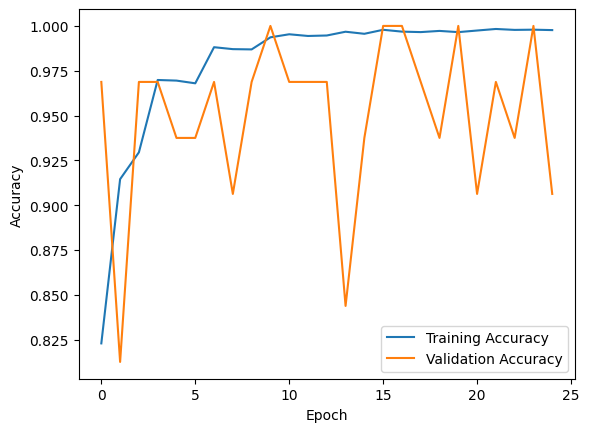

In [11]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [12]:
loss, accuracy = model.evaluate(valid_X, validation_labels, batch_size=32)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Test Loss: {loss:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 86ms/step - accuracy: 0.9590 - loss: 0.1737
Test Accuracy: 95.93%
Test Loss: 0.1683
